# Results on simulated data

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

## Generating datasets

In [2]:
import logistic as lgtc
import generate_alphas as ga

### Random faces

In [3]:
d = 100
K = 70
max_size = 8
p_geom = 0.25
list_charged_faces = ga.gen_random_alphas(d, K, max_size, p_geom, with_singlet=False)[0]

### Faces to accept/reject

In [4]:
all_faces = ga.all_sub_alphas(list_charged_faces)
dict_true_faces = ga.dict_size(all_faces)
dict_false_faces = ga.dict_falses(dict_true_faces, d)

### Logistic datasets

In [20]:
n = int(5e4)
as_dep = 0.5
X = lgtc.asym_logistic(d, list_charged_faces, n, as_dep)

## Extreme points

In [14]:
import extreme_data as xtr
V = xtr.rank_transformation(X)

## Recovering true faces

In [7]:
import hill_estimator as hill
import kappa_estimator as kap

def freq(face, V, r):
    return np.sum(np.prod(V[:, face] > r, axis=1))/int(V.shape[0]/r - 1)

def kappa(face, V, r):
    return np.sum(np.prod(V[:, face] > r, axis=1))/np.sum(np.sum(V[:, face] > r, axis=1) >= len(face)-1)

def kap_as(face, V, r, kappa_min, delta):
    k = int(V.shape[0]/r - 1)
    r_p = V.shape[0]/(k + int(k**(3./4)) + 1)
    r_m = V.shape[0]/(k - int(k**(3./4)) + 1)
    return kap.kappa_test(V > r, V > r_p, V > r_m, face, k, kappa_min, delta)[0]

def hll(face, V, r, delta):
    k = int(V.shape[0]/r - 1)
    r_p = V.shape[0]/(k + int(k**(3./4)) + 1)
    r_m = V.shape[0]/(k - int(k**(3./4)) + 1)
    return hill.hill_test(V, V > r, V > r_p, V > r_m, face, k, delta)[0]

In [16]:
def gap_freq(V, r, dict_true_faces, dict_false_faces):
    t_f = [[freq(face_s, V, r) for face_s in dict_true_faces[s]] for s in dict_true_faces.keys()]
    f_f = [[freq(face_s, V, r) for face_s in dict_false_faces[s]] for s in dict_false_faces.keys()]
    return min([min(t_f_s) for t_f_s in t_f]) - max([max(f_f_s) for f_f_s in f_f])

def gap_kap(V, r, dict_true_faces, dict_false_faces):
    t_f = [[kappa(face_s, V, r) for face_s in dict_true_faces[s]] for s in dict_true_faces.keys()]
    f_f = [[kappa(face_s, V, r) for face_s in dict_false_faces[s]] for s in dict_false_faces.keys()]
    return min([min(t_f_s) for t_f_s in t_f]) - max([max(f_f_s) for f_f_s in f_f])

def gap_kap_as(V, r, dict_true_faces, dict_false_faces, kappa_min, delta):
    t_f = [[kap_as(face_s, V, r, kappa_min, delta) for face_s in dict_true_faces[s]] for s in dict_true_faces.keys()]
    f_f = [[kap_as(face_s, V, r, kappa_min, delta) for face_s in dict_false_faces[s]] for s in dict_false_faces.keys()]
    g = min([min(t_f_s) for t_f_s in t_f]) - max([max(f_f_s) for f_f_s in f_f])
    return min([min(t_f_s) for t_f_s in t_f]) - max([max(f_f_s) for f_f_s in f_f])
#1*(min([min(t_f_s) for t_f_s in t_f]) > 0) + 1*(max([max(f_f_s) for f_f_s in f_f]) < 0)

def gap_hill(V, r, dict_true_faces, dict_false_faces, delta):
    t_f = [[hll(face_s, V, r, delta) for face_s in dict_true_faces[s]] for s in dict_true_faces.keys()]
    f_f = [[hll(face_s, V, r, delta) for face_s in dict_false_faces[s]] for s in dict_false_faces.keys()]
    return min([min(t_f_s) for t_f_s in t_f]) - max([max(f_f_s) for f_f_s in f_f])
#1*(min([min(t_f_s) for t_f_s in t_f]) > 0) + 1*(max([max(f_f_s) for f_f_s in f_f]) < 0)

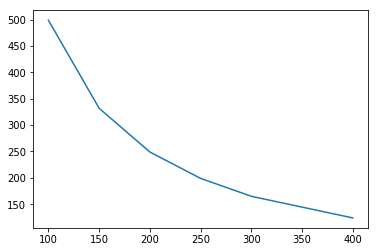

In [15]:
%matplotlib inline
rs = [100., 150., 200., 250., 300., 400.]
ks = [int(V.shape[0]/r - 1) for r in rs]
plt.plot(rs, ks)

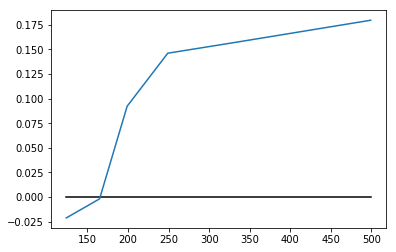

In [17]:
%matplotlib inline
delta = 0.0001
g_r = [gap_hill(V, r, dict_true_faces, dict_false_faces, delta) for r in rs]
plt.plot(ks, np.zeros(len(ks)), 'k')
plt.plot(ks, g_r)

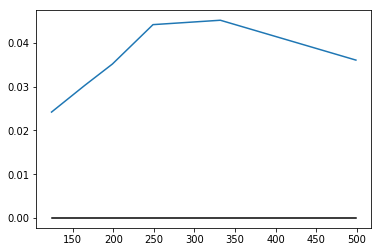

In [18]:
%matplotlib inline
g_r = [gap_freq(V, r, dict_true_faces, dict_false_faces) for r in rs]
plt.plot(ks, np.zeros(len(ks)), 'k')
plt.plot(ks, g_r)

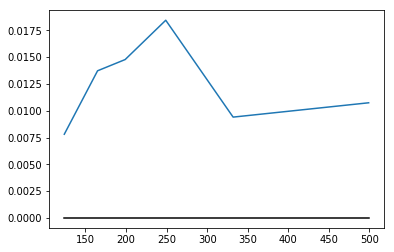

In [19]:
%matplotlib inline
g_r = [gap_kap(V, r, dict_true_faces, dict_false_faces) for r in rs]
plt.plot(ks, np.zeros(len(ks)), 'k')
plt.plot(ks, g_r)

In [ ]:
%matplotlib inline
kappa_min = 0.1
delta = 0.0001
g_r = [gap_kap_as(V, r, dict_true_faces, dict_false_faces, kappa_min, delta) for r in rs]
plt.plot(ks, np.zeros(len(ks)), 'k')
plt.plot(ks, g_r)